<a href="https://colab.research.google.com/github/ASHISHSRIVa/Linkedin-Job-Posts-Prediction/blob/main/Linkedin_Job_Posts_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

IMPORT DATASET

In [19]:
df=pd.read_csv("/Copy of linkedin_job_posts_insights 3.csv",encoding='ISO-8859-1')
df

,JOB TITLE,COMPANY NAME,LOCATION,HIRING STATUS,DATE
0,\n \n AWS Architect\n \...,\n cFocus Software Incorporated\n ...,\n United States\n,HIRING STATUS,16-03-2023
1,\n \n Azure cloud engineer_D...,\n CodersBrain\n,"\n Bengaluru, Karnataka, India\n ...",\n Be an early applicant\n,24-03-2023
2,\n \n Cloud Engineer\n ...,\n Supersourcing\n,\n India\n,\n Actively Hiring\n,24-03-2023
3,\n \n Content Writer\n ...,\n MadHawks\n,"\n Gurugram, Haryana, India\n ...",\n Actively Hiring\n,28-02-2023
4,\n \n Data Analyst I\n ...,\n Signant Health\n,\n Greater Hyderabad Area\n,\n Actively Hiring\n,15-03-2023
...,...,...,...,...,...
294,Senior Machine Learning Engineer,Anduril Industries,"Sydney, New South Wales, Australia",Actively Hiring,24-04-2023
295,Embedded Firmware Engineer,Diverse Lynx,"Columbus, IN",Be an early applicant,10-03-2023
296,Senior Consultant - Business Analyst,MTX Group,"Hyderabad, Telangana, India",Actively Hiring,09-04-2023
297,Senior Team Assistant,NaN,"Sydney, New South Wales, Australia",Be an early applicant,18-04-2023


PREPROCESSING DATA

In [9]:
df.head()

,JOB TITLE,COMPANY NAME,LOCATION,HIRING STATUS,DATE
0,\n \n AWS Architect\n \...,\n cFocus Software Incorporated\n ...,\n United States\n,HIRING STATUS,16-03-2023
1,\n \n Azure cloud engineer_D...,\n CodersBrain\n,"\n Bengaluru, Karnataka, India\n ...",\n Be an early applicant\n,24-03-2023
2,\n \n Cloud Engineer\n ...,\n Supersourcing\n,\n India\n,\n Actively Hiring\n,24-03-2023
3,\n \n Content Writer\n ...,\n MadHawks\n,"\n Gurugram, Haryana, India\n ...",\n Actively Hiring\n,28-02-2023
4,\n \n Data Analyst I\n ...,\n Signant Health\n,\n Greater Hyderabad Area\n,\n Actively Hiring\n,15-03-2023


In [10]:
df.tail()

,JOB TITLE,COMPANY NAME,LOCATION,HIRING STATUS,DATE
294,Senior Machine Learning Engineer,Anduril Industries,"Sydney, New South Wales, Australia",Actively Hiring,24-04-2023
295,Embedded Firmware Engineer,Diverse Lynx,"Columbus, IN",Be an early applicant,10-03-2023
296,Senior Consultant - Business Analyst,MTX Group,"Hyderabad, Telangana, India",Actively Hiring,09-04-2023
297,Senior Team Assistant,NaN,"Sydney, New South Wales, Australia",Be an early applicant,18-04-2023
298,Data Engineer (m/w/d) f?r unser Public-Team,"The Weather Company, an IBM Business","Frankfurt am Main, Hesse, Germany",Be an early applicant,10-04-2023


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   JOB TITLE      294 non-null    object
 1   COMPANY NAME   283 non-null    object
 2   LOCATION       294 non-null    object
 3   HIRING STATUS  294 non-null    object
 4   DATE           294 non-null    object
dtypes: object(5)
memory usage: 11.8+ KB


In [12]:
df.isnull().sum()

JOB TITLE         5
COMPANY NAME     16
LOCATION          5
HIRING STATUS     5
DATE              5
dtype: int64

In [13]:
df.describe()

,JOB TITLE,COMPANY NAME,LOCATION,HIRING STATUS,DATE
count,294,283,294,294,294
unique,230,258,153,9,91
top,Senior Data Scientist,Recruiting from Scratch,"London, England, United Kingdom",Be an early applicant,17-04-2023
freq,6,5,19,132,12


In [14]:
df.shape

(299, 5)

In [15]:
df.columns

Index(['JOB TITLE', 'COMPANY NAME', 'LOCATION', 'HIRING STATUS', 'DATE'], dtype='object')

In [16]:
df["LOCATION"].unique()

array(['\n            United States\n          ',
       '\n            Bengaluru, Karnataka, India\n          ',
       '\n            India\n          ',
       '\n            Gurugram, Haryana, India\n          ',
       '\n            Greater Hyderabad Area\n          ',
       '\n            Hyderabad, Telangana, India\n          ',
       '\n            Mumbai, Maharashtra, India\n          ',
       '\n            Irvine, CA\n          ',
       '\n            Manchester, England, United Kingdom\n          ',
       '\n            Soho, England, United Kingdom\n          ',
       '\n            Southampton, England, United Kingdom\n          ',
       '\n            London, England, United Kingdom\n          ',
       '\n            Sydney, New South Wales, Australia\n          ',
       '\n            Indianapolis, IN\n          ',
       '\n            Los Angeles, CA\n          ',
       '\n            Dallas, TX\n          ',
       '\n            New York City Metropolitan

In [ ]:
df.dtypes

JOB TITLE        object
COMPANY NAME     object
LOCATION         object
HIRING STATUS    object
DATE             object
dtype: object

In [17]:
df['COMPANY NAME'].value_counts()

Recruiting from Scratch                      5
IBM                                          5
CodersBrain                                  3
Growth Cave                                  3
Cobblestone Energy                           3
                                            ..
Viralstyle                                   1
Vegam Solutions                              1
\n            eGov Foundation\n              1
Labcorp                                      1
The Weather Company, an IBM Business         1
Name: COMPANY NAME, Length: 258, dtype: int64

VISUALISING DATA

<Axes: xlabel='LOCATION', ylabel='count'>

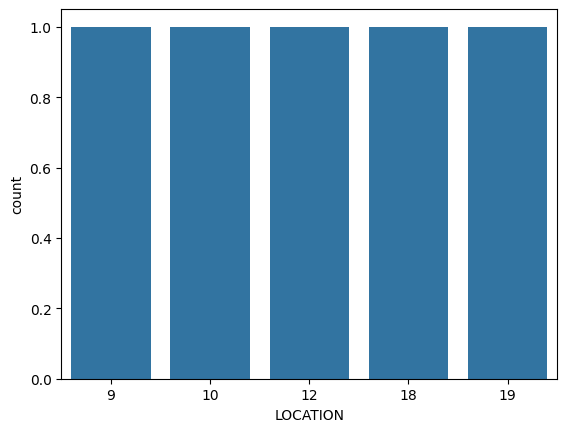

In [18]:
sns.countplot(x=df['LOCATION'].value_counts()[:5])

<Axes: xlabel='DATE'>

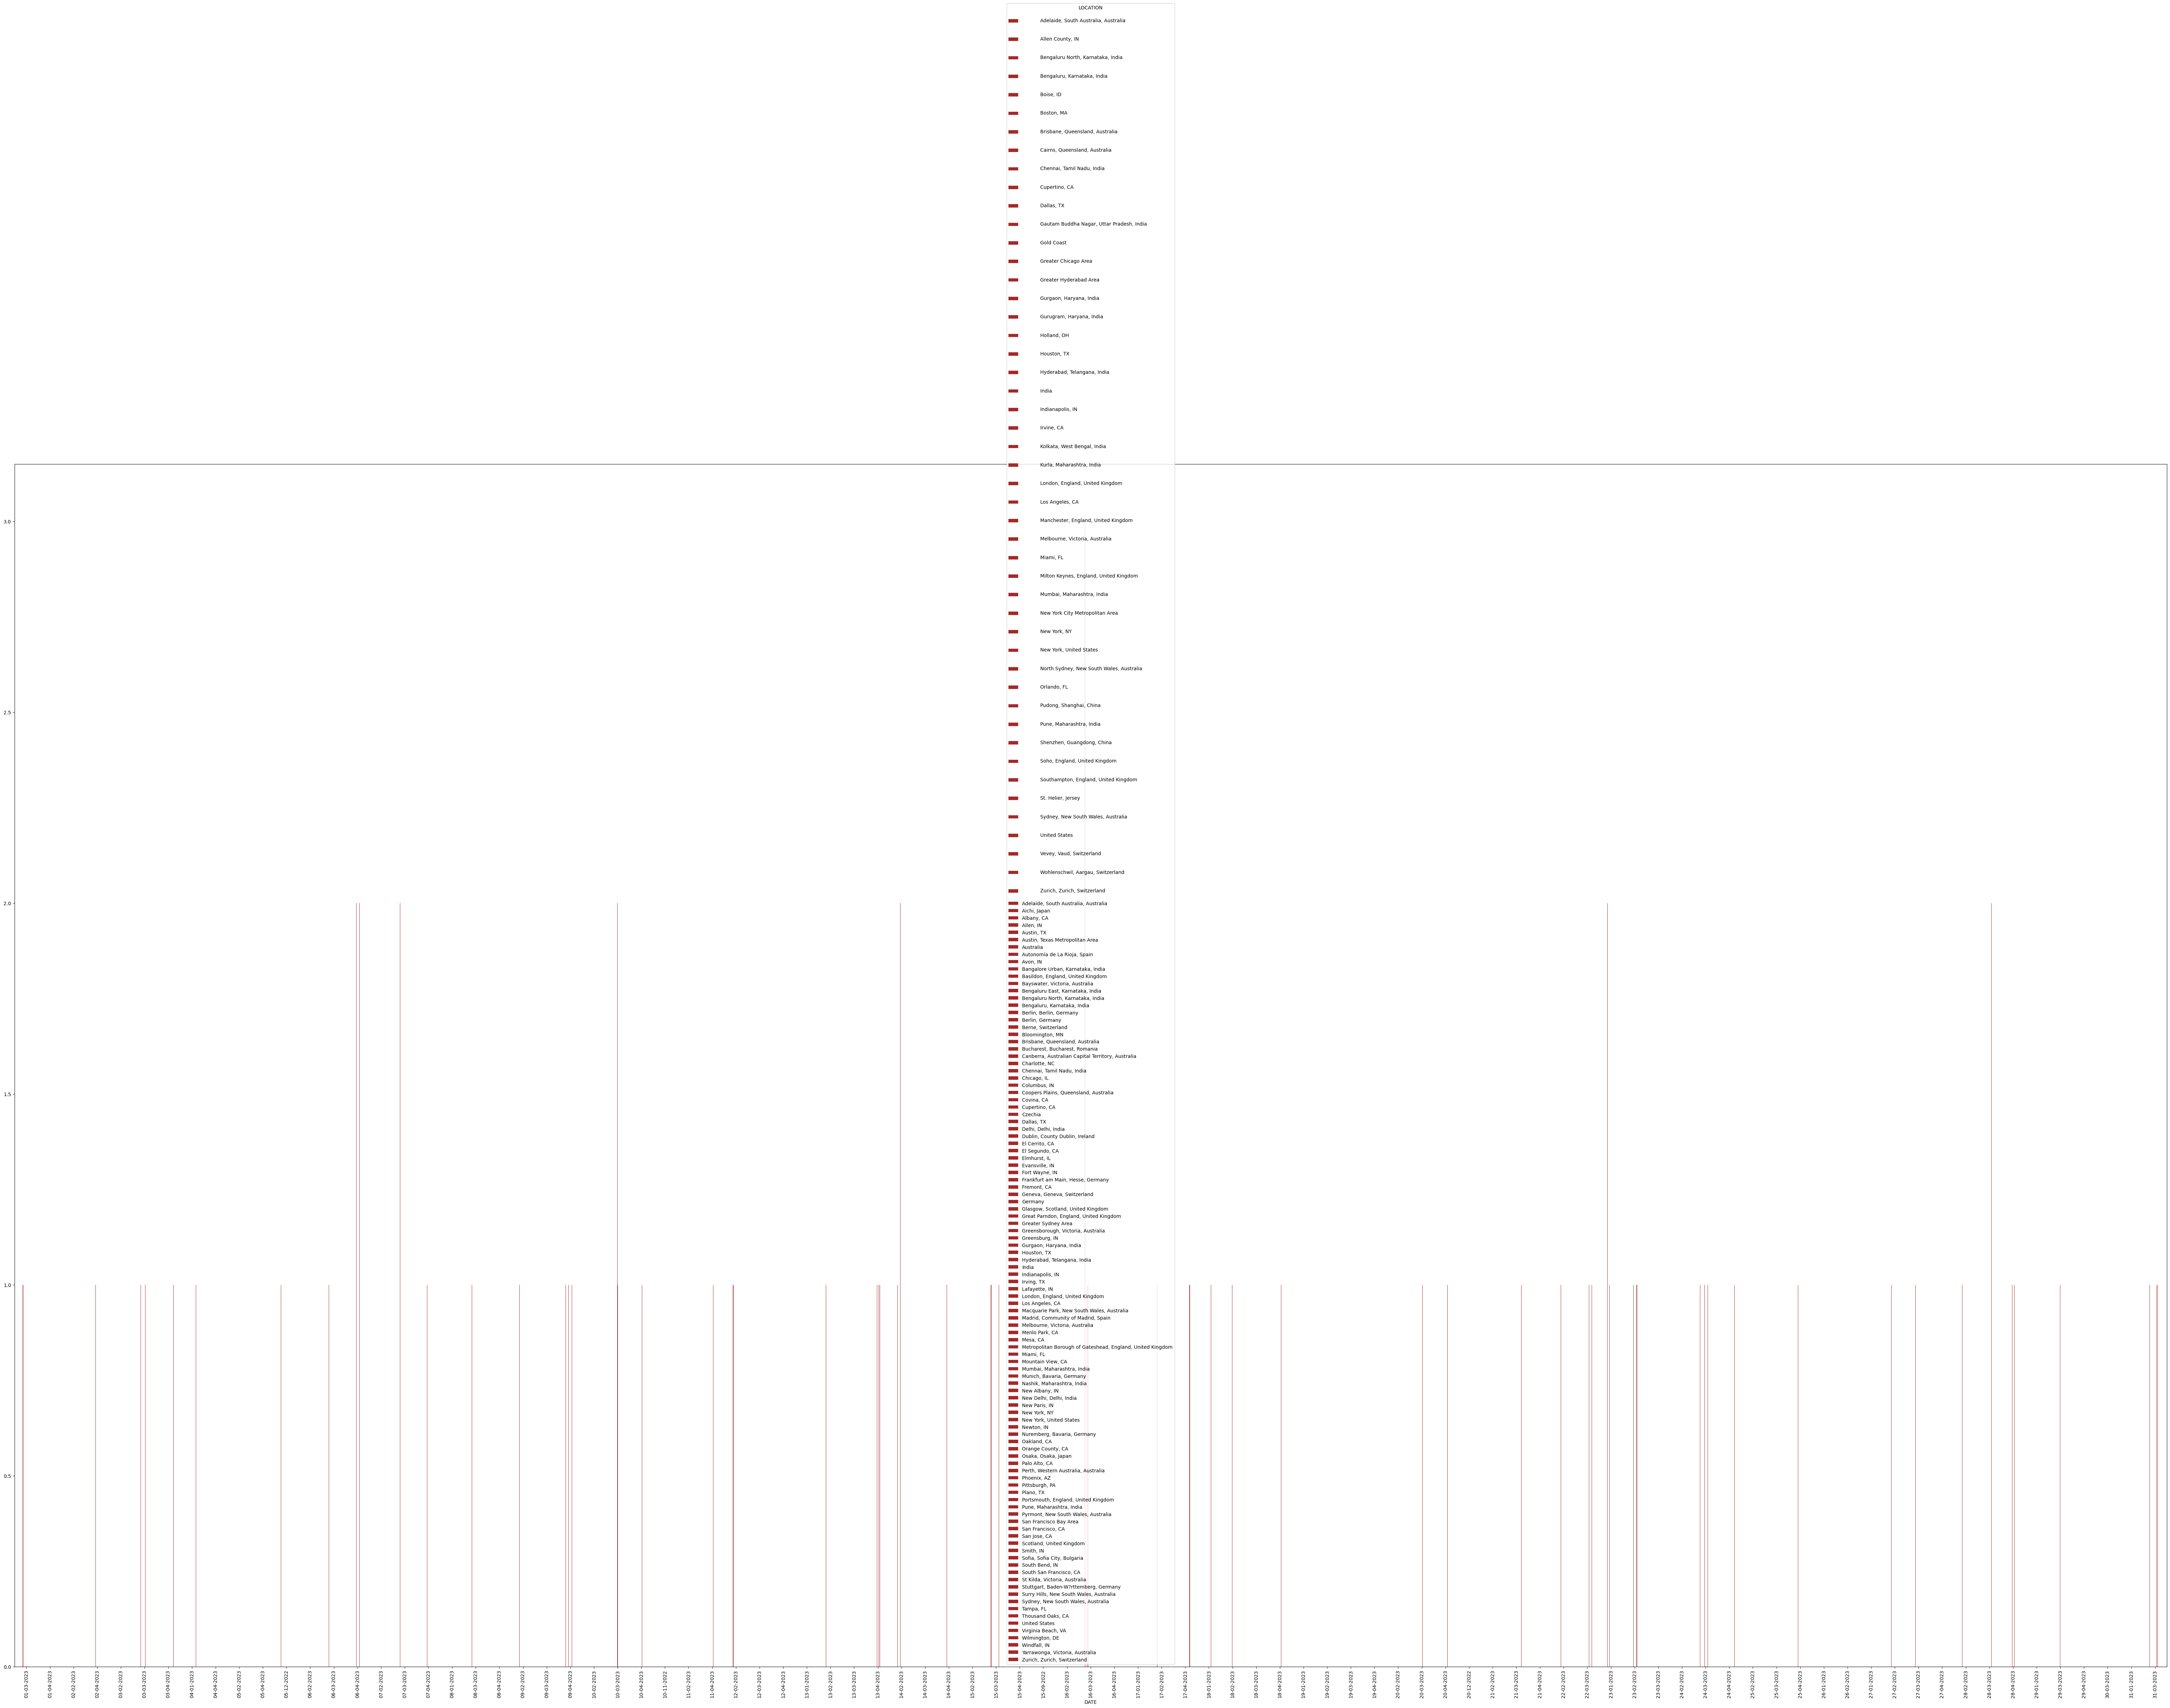

In [19]:
pd.crosstab(df.DATE, df.LOCATION).plot(kind='bar',figsize=(80,45),color='brown')

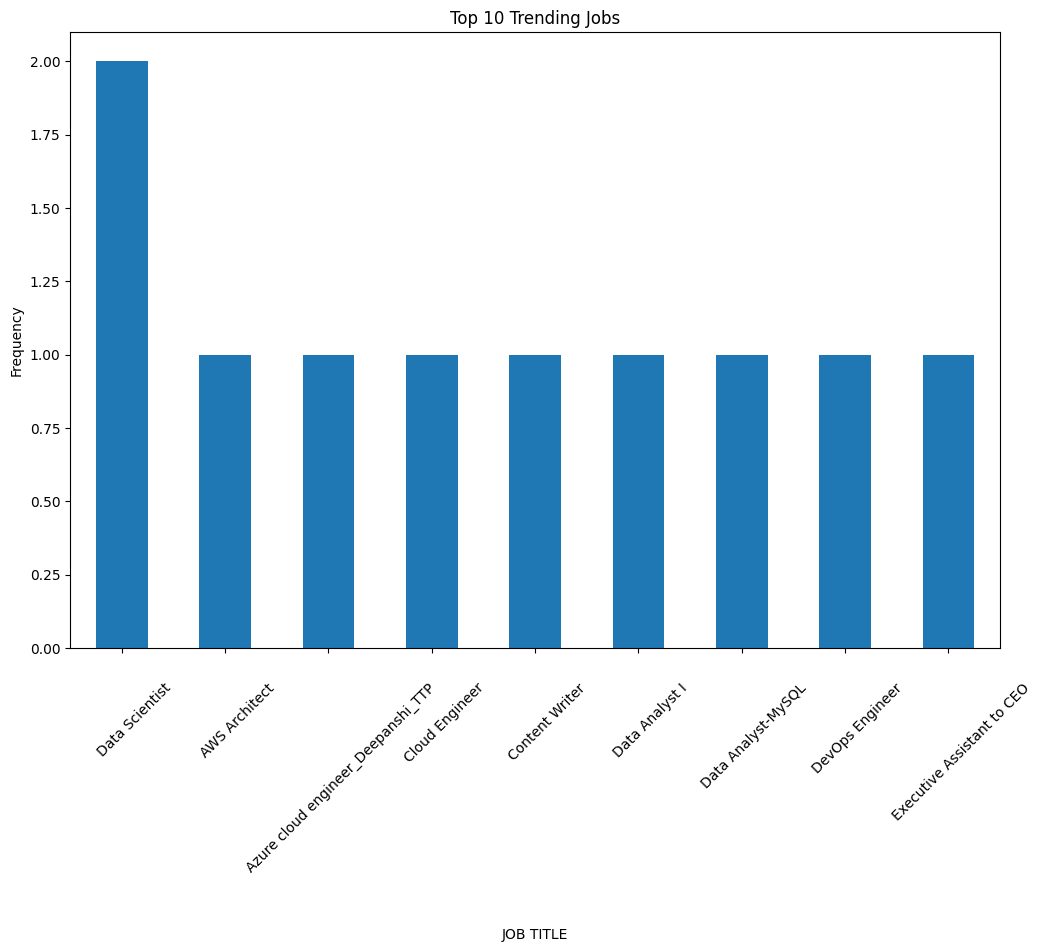

In [16]:
job_counts = df['JOB TITLE'].value_counts()
jobs = job_counts.sort_values(ascending=False)
top_jobs = jobs.head(10)
plt.figure(figsize=(12,8))
top_jobs.plot(kind='bar')
plt.title('Top 10 Trending Jobs')
plt.xlabel('JOB TITLE')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

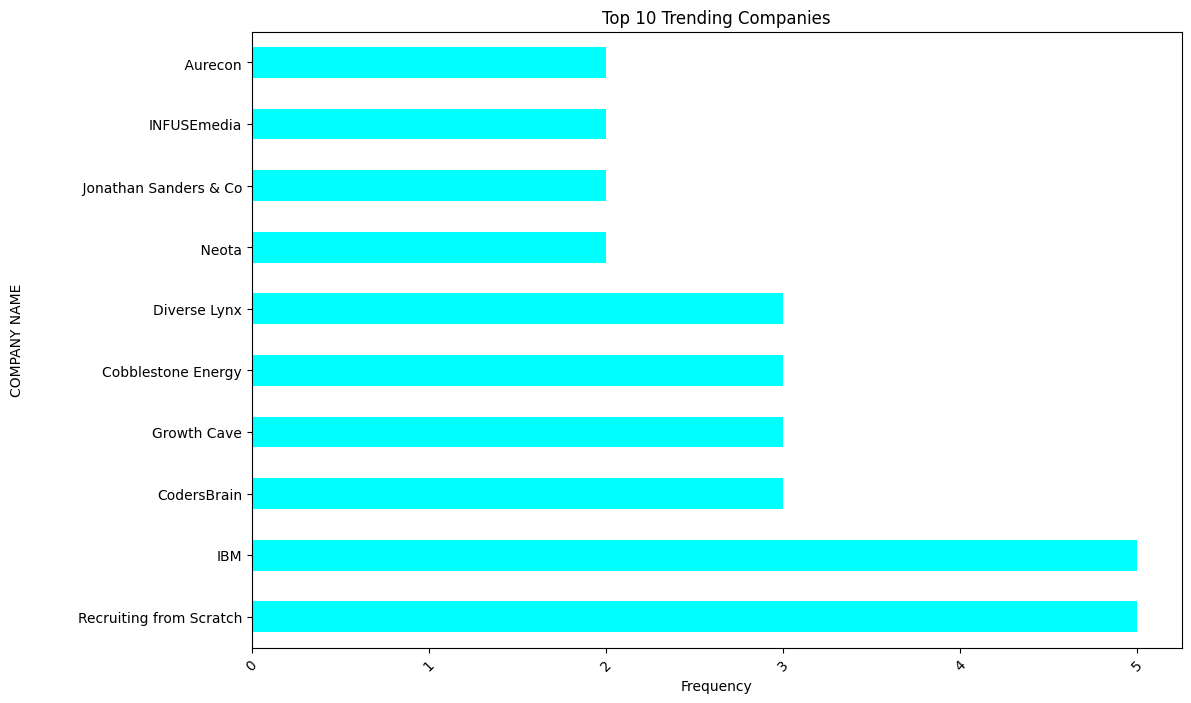

In [26]:
job_counts = df['COMPANY NAME'].value_counts()
jobs = job_counts.sort_values(ascending=False)
top_jobs = jobs.head(10)
plt.figure(figsize=(12,8))
top_jobs.plot(kind='barh', color='cyan')
plt.title('Top 10 Trending Companies')
plt.xlabel('Frequency')
plt.ylabel('COMPANY NAME')
plt.xticks(rotation=45)
plt.show()

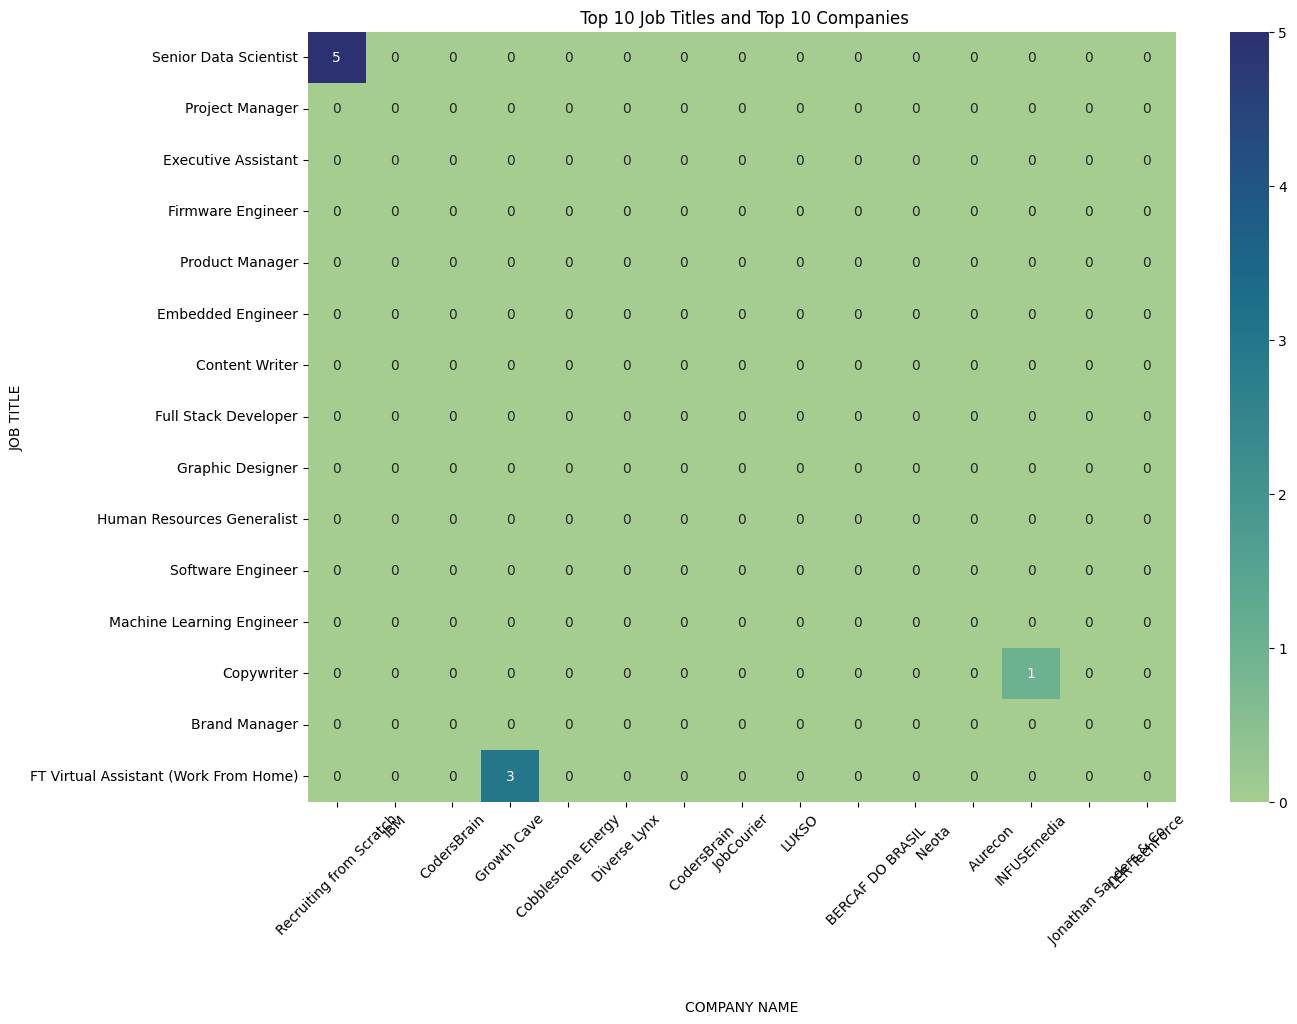

In [33]:
job_company_counts = df.groupby(['JOB TITLE', 'COMPANY NAME']).size().unstack(fill_value=0)
top_10_jobs = df['JOB TITLE'].value_counts().head(15).index
top_10_companies = df['COMPANY NAME'].value_counts().head(15).index
job_company_counts = job_company_counts.loc[top_10_jobs, top_10_companies]
plt.figure(figsize=(14, 10))
sns.heatmap(job_company_counts, cmap='crest', annot=True, fmt='d')
plt.title(' Top 10 Job Titles and Top 10 Companies')
plt.xlabel('COMPANY NAME')
plt.ylabel('JOB TITLE')
plt.xticks(rotation=45)
plt.show()